#Atividade de Frequência 



*   Entregar uma implementação em Python para transformação de espaço (descorrelacionar) dos dados da UCI, exceto IRIS e WINE

## 1.   *Importações dos módulos gerais*

    * Aqui serão importados o numpy, o pandas e o matplotlib/seaborn para plots




In [2]:
# This is not strictly for a Python rather. 
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()                         #Configura os plots do matplotlib para terem os mesmos estilos do seaborn
sns.set_style("whitegrid")        #Alterando o estilo do plot para melhor vizualização no colab (Tema escuro fica ruim de ver o fundo)

## 2.   *Leitura do Dataset "Breast Cancer Wisconsin"*

      *   O dataset será retirado de um repositório pessoal do GITHUB


In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/Berawecker/Datasets/main/Breast_Cancer_Wisconsin.csv')
data = data.drop(["id", "Unnamed: 32"], axis = 1)
 
data    #print do dataset para verificação

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Por questão do tamanho do dataset, ele será dividido em 3 partes:
* mean
* se
* worst

In [33]:
data_mean = data.iloc[:, 1:11] 
data_mean["diagnosis"] = data["diagnosis"]

data_se =  data.iloc[:, 11:21]
data_se["diagnosis"] = data["diagnosis"]

data_worst = data.iloc[:, 21:]
data_worst["diagnosis"] = data["diagnosis"]

     radius_mean  texture_mean  ...  fractal_dimension_mean  diagnosis
0          17.99         10.38  ...                 0.07871          M
1          20.57         17.77  ...                 0.05667          M
2          19.69         21.25  ...                 0.05999          M
3          11.42         20.38  ...                 0.09744          M
4          20.29         14.34  ...                 0.05883          M
..           ...           ...  ...                     ...        ...
564        21.56         22.39  ...                 0.05623          M
565        20.13         28.25  ...                 0.05533          M
566        16.60         28.08  ...                 0.05648          M
567        20.60         29.33  ...                 0.07016          M
568         7.76         24.54  ...                 0.05884          B

[569 rows x 11 columns]


## 3.   Gráficos dos dados inalterados

    * Contabilização das classes

<Figure size 7200x4800 with 0 Axes>

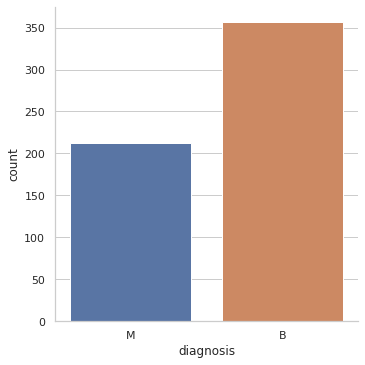

In [9]:
plt.figure(dpi = 1200)
sns.catplot(x = "diagnosis", data = data, kind = "count")

    * Cálculo e plot da matriz de correlação

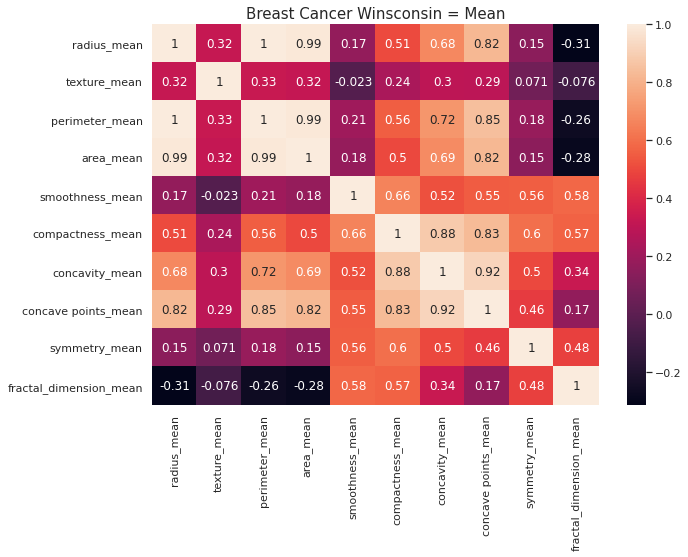

In [28]:
corr_mean = data_mean.corr()
plt.figure(figsize = (10,7))
sns.set(font_scale = 1)
plt.title('Breast Cancer Winsconsin = Mean', fontsize = 15)
sns.heatmap(corr_mean, color = 'k', annot = True)

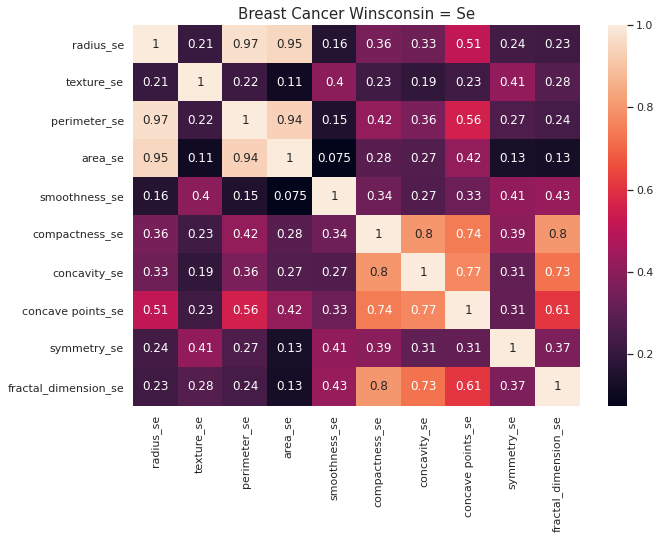

In [31]:
corr_se = data_se.corr()
plt.figure(figsize = (10,7))
sns.set(font_scale = 1)
plt.title('Breast Cancer Winsconsin = Se', fontsize = 15)
sns.heatmap(corr_se, color = 'k', annot = True)

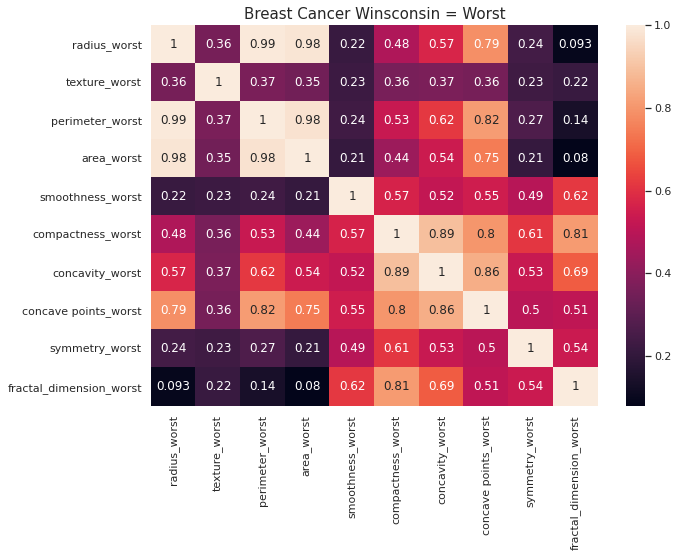

In [30]:
corr_worst = data_worst.corr()
plt.figure(figsize = (10,7))
sns.set(font_scale = 1)
plt.title('Breast Cancer Winsconsin = Worst', fontsize = 15)
sns.heatmap(corr_worst, color = 'k', annot = True)

    * Pairplot do dataset para melhor visualização das caracteristicas de correlação

In [39]:
sns.pairplot(data_mean, hue = "diagnosis", palette = "brg")

Output hidden; open in https://colab.research.google.com to view.

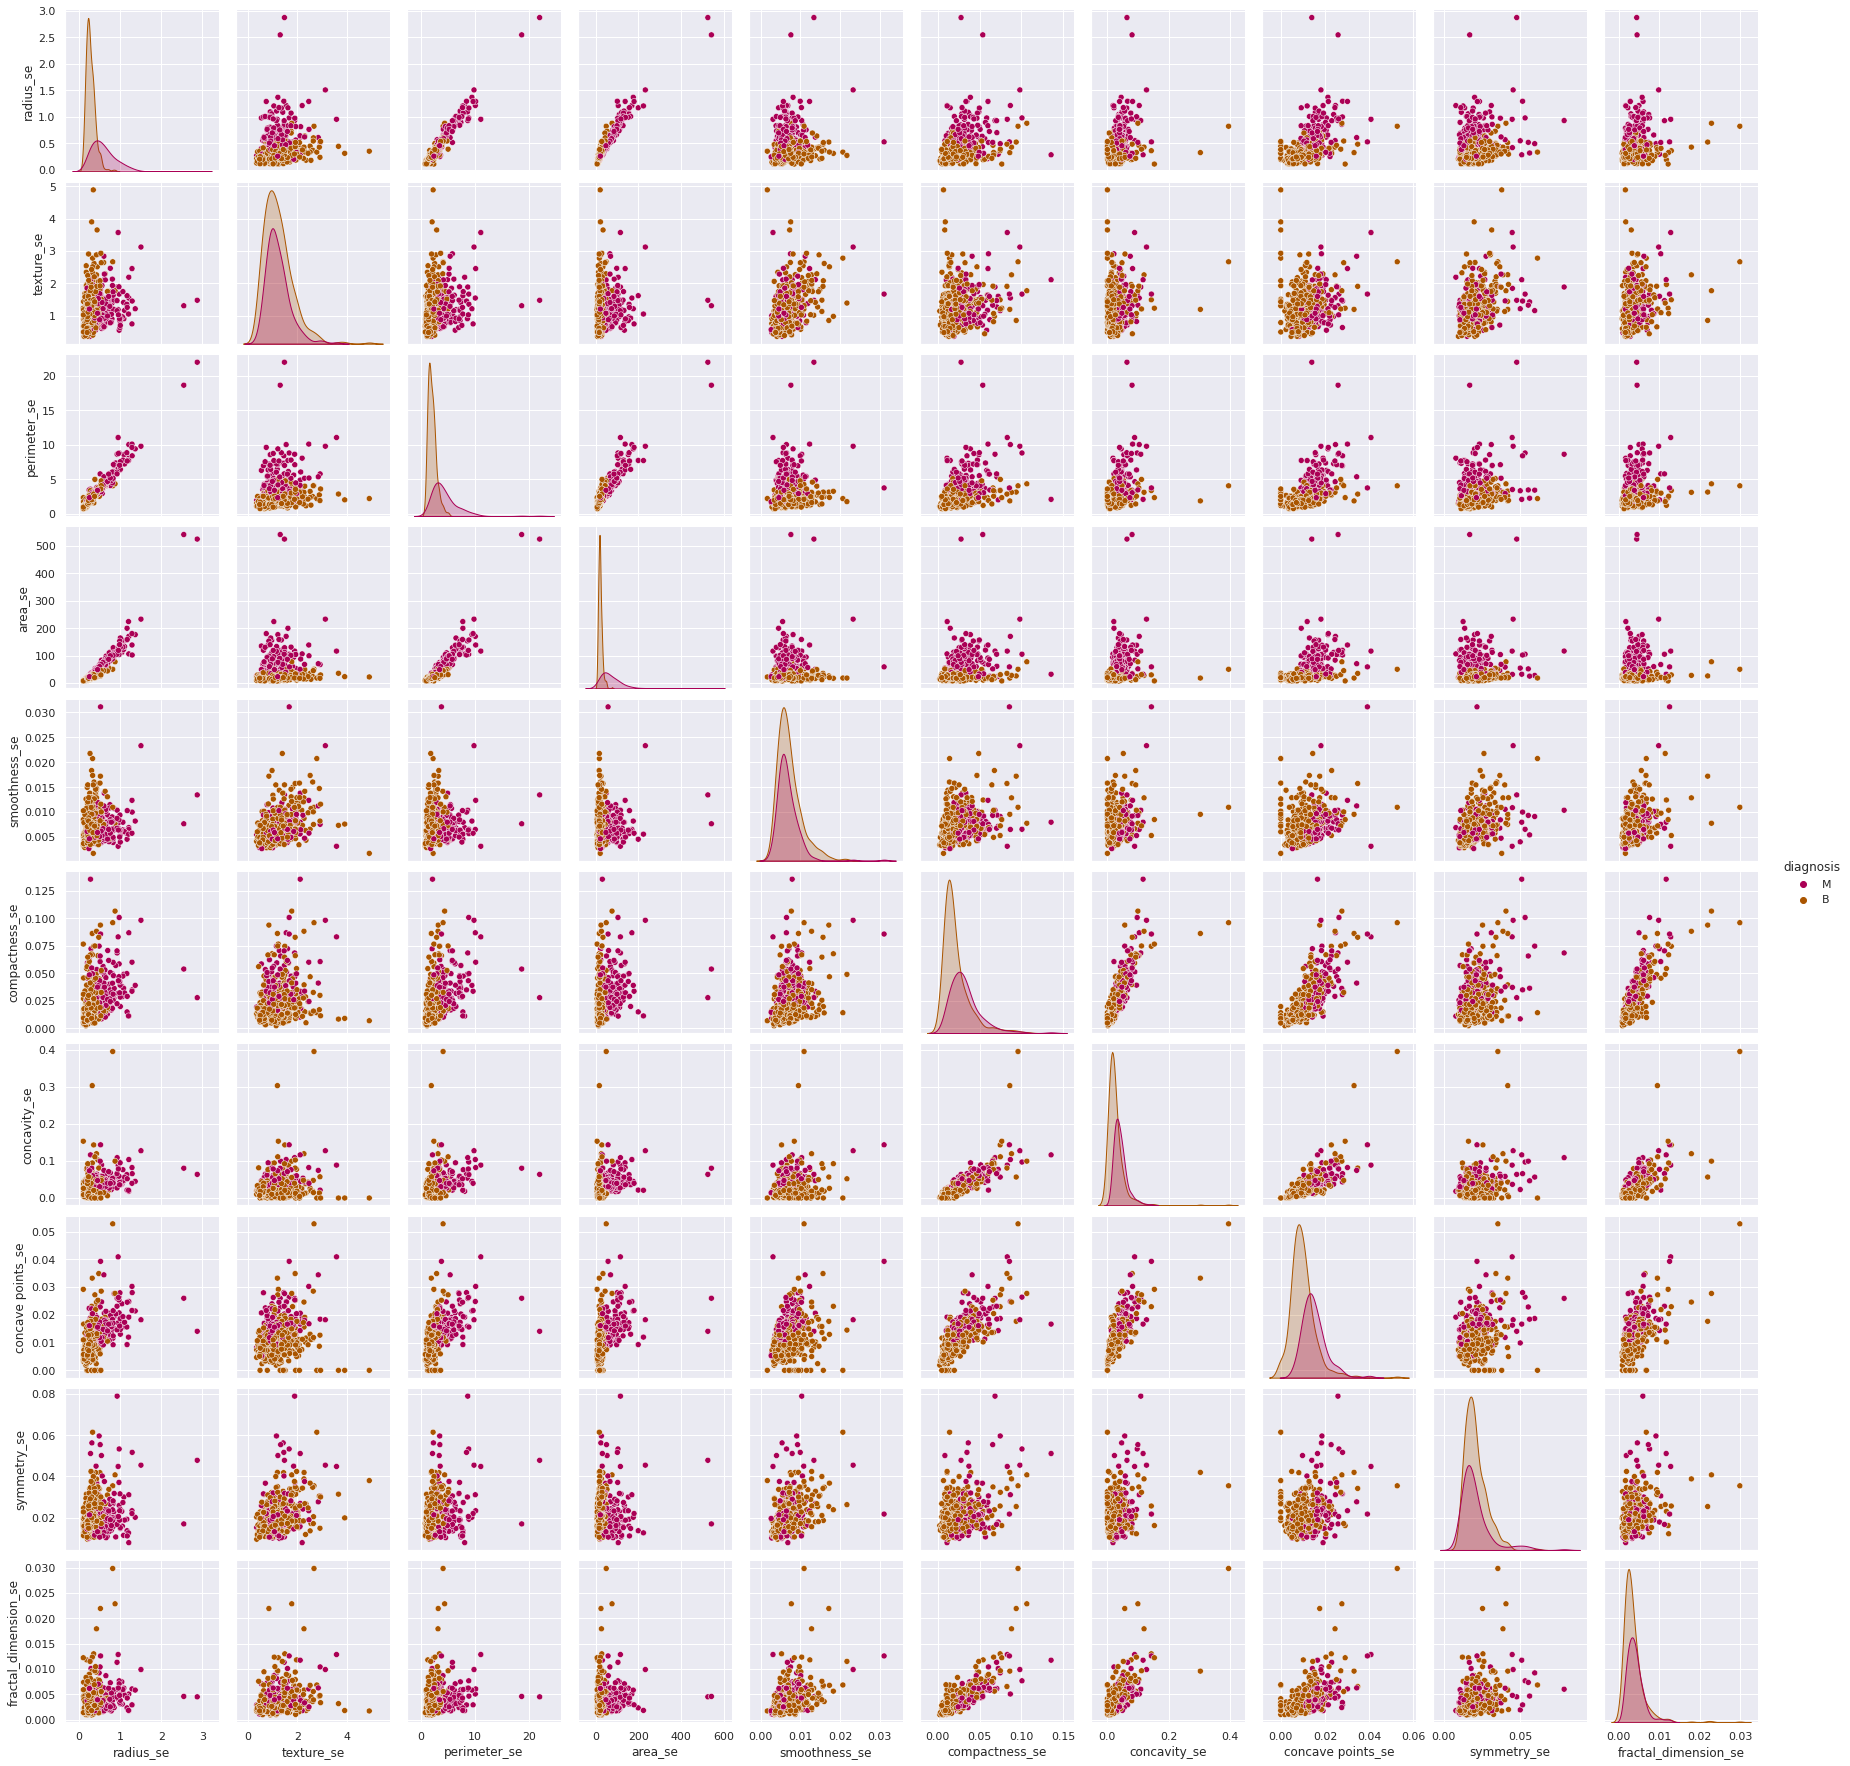

In [36]:
sns.pairplot(data_se, hue = "diagnosis", palette = "brg")

In [40]:
sns.pairplot(data_worst, hue = "diagnosis", palette = "brg")

Output hidden; open in https://colab.research.google.com to view.

    * Plot de uma amostra para melhor visualização da transformação
    * Foram escolhidas as colunas 'radius_mean' e 'perimeter_mean' por serem 100% correlacionados

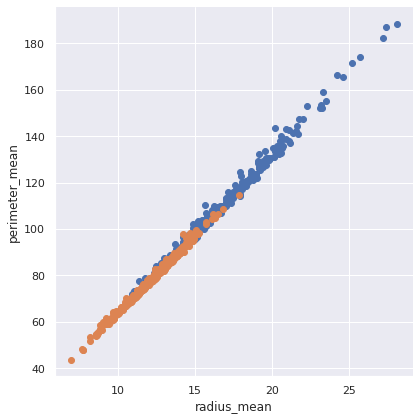

In [42]:
sns.FacetGrid(data, hue = "diagnosis", height = 6).map(plt.scatter, "radius_mean", "perimeter_mean")

## 4.   Transformação do espaço

    * Primeiro se realiza a normalização dos dados

In [43]:
from sklearn.preprocessing import StandardScaler

Escala = StandardScaler()         
data.iloc[:, 1:] = Escala.fit_transform(data.iloc[:, 1:].values)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [44]:
#Criação da matriz de covariância
cov_matrix = data.iloc[:, 1:].cov()
cov_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.001761,0.324352,0.999612,0.989095,0.170882,0.507015,0.677955,0.823977,0.148001,-0.312179,0.680286,-0.097489,0.675359,0.737159,-0.222992,0.206363,0.194546,0.376831,-0.104505,-0.042716,0.971246,0.297531,0.966836,0.942739,0.119827,0.414191,0.527839,0.745524,0.164242,0.007078
texture_mean,0.324352,1.001761,0.330113,0.321651,-0.023430,0.237119,0.302950,0.293981,0.071527,-0.076572,0.276354,0.387038,0.282169,0.260302,0.006625,0.192313,0.143545,0.164139,0.009143,0.054553,0.353194,0.913650,0.358670,0.344151,0.077640,0.278319,0.301555,0.295836,0.105193,0.119415
perimeter_mean,0.999612,0.330113,1.001761,0.988244,0.207643,0.557917,0.717396,0.852475,0.183349,-0.261937,0.692983,-0.086914,0.694355,0.746294,-0.203051,0.251185,0.228484,0.407934,-0.081773,-0.005533,0.971183,0.303572,0.972095,0.943207,0.150814,0.456577,0.564872,0.772599,0.189448,0.051108
area_mean,0.989095,0.321651,0.988244,1.001761,0.177340,0.499379,0.687191,0.824718,0.151559,-0.283608,0.733852,-0.066397,0.727908,0.801495,-0.167070,0.212957,0.208026,0.372976,-0.072624,-0.019922,0.964441,0.287995,0.960808,0.960902,0.123740,0.391098,0.513508,0.723288,0.143823,0.003744
smoothness_mean,0.170882,-0.023430,0.207643,0.177340,1.001761,0.660284,0.522903,0.554670,0.558757,0.585822,0.301998,0.068527,0.296613,0.246987,0.332961,0.319505,0.248833,0.381346,0.201128,0.284106,0.213495,0.036135,0.239273,0.207082,0.806742,0.473300,0.435691,0.503939,0.395004,0.500195
compactness_mean,0.507015,0.237119,0.557917,0.499379,0.660284,1.001761,0.884675,0.832598,0.603702,0.566364,0.498349,0.046286,0.549872,0.456455,0.135537,0.740022,0.571521,0.643393,0.230381,0.508211,0.536258,0.248570,0.591250,0.510501,0.566537,0.867333,0.817712,0.817009,0.511122,0.688593
concavity_mean,0.677955,0.302950,0.717396,0.687191,0.522903,0.884675,1.001761,0.923013,0.501548,0.337376,0.633037,0.076353,0.661553,0.618514,0.098737,0.671459,0.692487,0.684463,0.178323,0.450092,0.689448,0.300407,0.730849,0.677177,0.449612,0.756297,0.885659,0.862839,0.410185,0.515836
concave points_mean,0.823977,0.293981,0.852475,0.824718,0.554670,0.832598,0.923013,1.001761,0.463312,0.167211,0.699279,0.021517,0.711901,0.691514,0.027702,0.491288,0.439940,0.616718,0.095519,0.258037,0.831779,0.293267,0.857430,0.811055,0.453550,0.668629,0.753724,0.911758,0.376406,0.369310
symmetry_mean,0.148001,0.071527,0.183349,0.151559,0.558757,0.603702,0.501548,0.463312,1.001761,0.480766,0.303913,0.128278,0.314445,0.224365,0.187651,0.422402,0.343230,0.393990,0.449927,0.332370,0.186055,0.090810,0.219554,0.177505,0.427426,0.474033,0.434485,0.431054,0.701058,0.439185
fractal_dimension_mean,-0.312179,-0.076572,-0.261937,-0.283608,0.585822,0.566364,0.337376,0.167211,0.480766,1.001761,0.000111,0.164463,0.039900,-0.090329,0.402672,0.560822,0.447417,0.341799,0.345615,0.689343,-0.254138,-0.051359,-0.205512,-0.232263,0.505831,0.459606,0.346843,0.175634,0.334607,0.768648


    * Cálculo dos autovalores e autovetores

In [68]:
eigenValues, eigenVectors = np.linalg.eig(cov_matrix)

#organizando os auto valores e os auto vetores
idx = eigenValues.argsort()[::-1]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

eigenVectors

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02,  5.11187749e-02,
        -1.50583883e-01,  2.02924255e-01,  1.46712338e-01,
        -2.25384659e-01, -4.96986642e-02,  6.85700057e-02,
        -7.29289034e-02,  9.85526942e-02, -1.82579441e-01,
         1.92264989e-02,  1.29476396e-01, -1.31526670e-01,
        -2.11194013e-01,  2.11460455e-01, -7.02414091e-01],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02,  1.07922421e-01,
        -1.57841960e-01, -3.87061187e-02, -4.11029851e-02,
        -2.97886446e-02, -2.44134993e-01, -4.48369467e-

In [63]:
print("AutoVetores:", eigenValues)

AutoVetores: [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]


In [65]:
#Os 10 primeiros parâmetros são responsáveis por 95% da resposta final, logo, serão utilizados somente os 10 primeiros
eigenValues_porcentage = (eigenValues/sum(eigenValues))*100
sum(eigenValues_porcentage[:10])

95.15688143366667

    * Transformação do espaço

In [66]:
n_components = 10
eigenVectors_components = eigenVectors[:, :n_components]
data_reduced = np.dot(data.iloc[:, 1:].values, eigenVectors_components)

data_reduced

array([[ 9.19283683,  1.94858307, -1.12316616, ...,  0.39840723,
        -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269, ..., -0.24098846,
        -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759, ..., -0.09737374,
         0.02406564,  0.4542754 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ..., -0.34188704,
         0.39391682,  0.52087738],
       [10.37479406,  1.67201011, -1.87702933, ...,  0.28023861,
        -0.54203454, -0.08929612],
       [-5.4752433 , -0.67063679,  1.49044308, ..., -1.04635352,
         0.37410111, -0.04772557]])

In [71]:
#Salvando os dados em um dataframe
columns = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10"]
data_transformed = pd.DataFrame(data = data_reduced, columns = columns)
data_transformed["Outcome"] = data["diagnosis"]

data_transformed

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,Outcome
0,9.192837,1.948583,-1.123166,3.633731,1.195110,1.411424,-2.159370,0.398407,-0.157118,-0.877402,M
1,2.387802,-3.768172,-0.529293,1.118264,-0.621775,0.028656,-0.013358,-0.240988,-0.711905,1.106995,M
2,5.733896,-1.075174,-0.551748,0.912083,0.177086,0.541452,0.668166,-0.097374,0.024066,0.454275,M
3,7.122953,10.275589,-3.232790,0.152547,2.960878,3.053422,-1.429911,-1.059565,-1.405440,-1.116975,M
4,3.935302,-1.948072,1.389767,2.940639,-0.546747,-1.226495,0.936213,-0.636376,-0.263805,0.377704,M
...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,0.074824,-2.375193,0.596130,0.035471,0.987929,0.256989,M
565,3.793382,-3.584048,2.088476,-2.506028,0.510723,-0.246710,0.716326,1.113360,-0.105207,-0.108632,M
566,1.256179,-1.902297,0.562731,-2.089227,-1.809991,-0.534447,0.192758,-0.341887,0.393917,0.520877,M
567,10.374794,1.672010,-1.877029,-2.356031,0.033742,0.567936,-0.223082,0.280239,-0.542035,-0.089296,M


    * Pairplot dos dados transformados

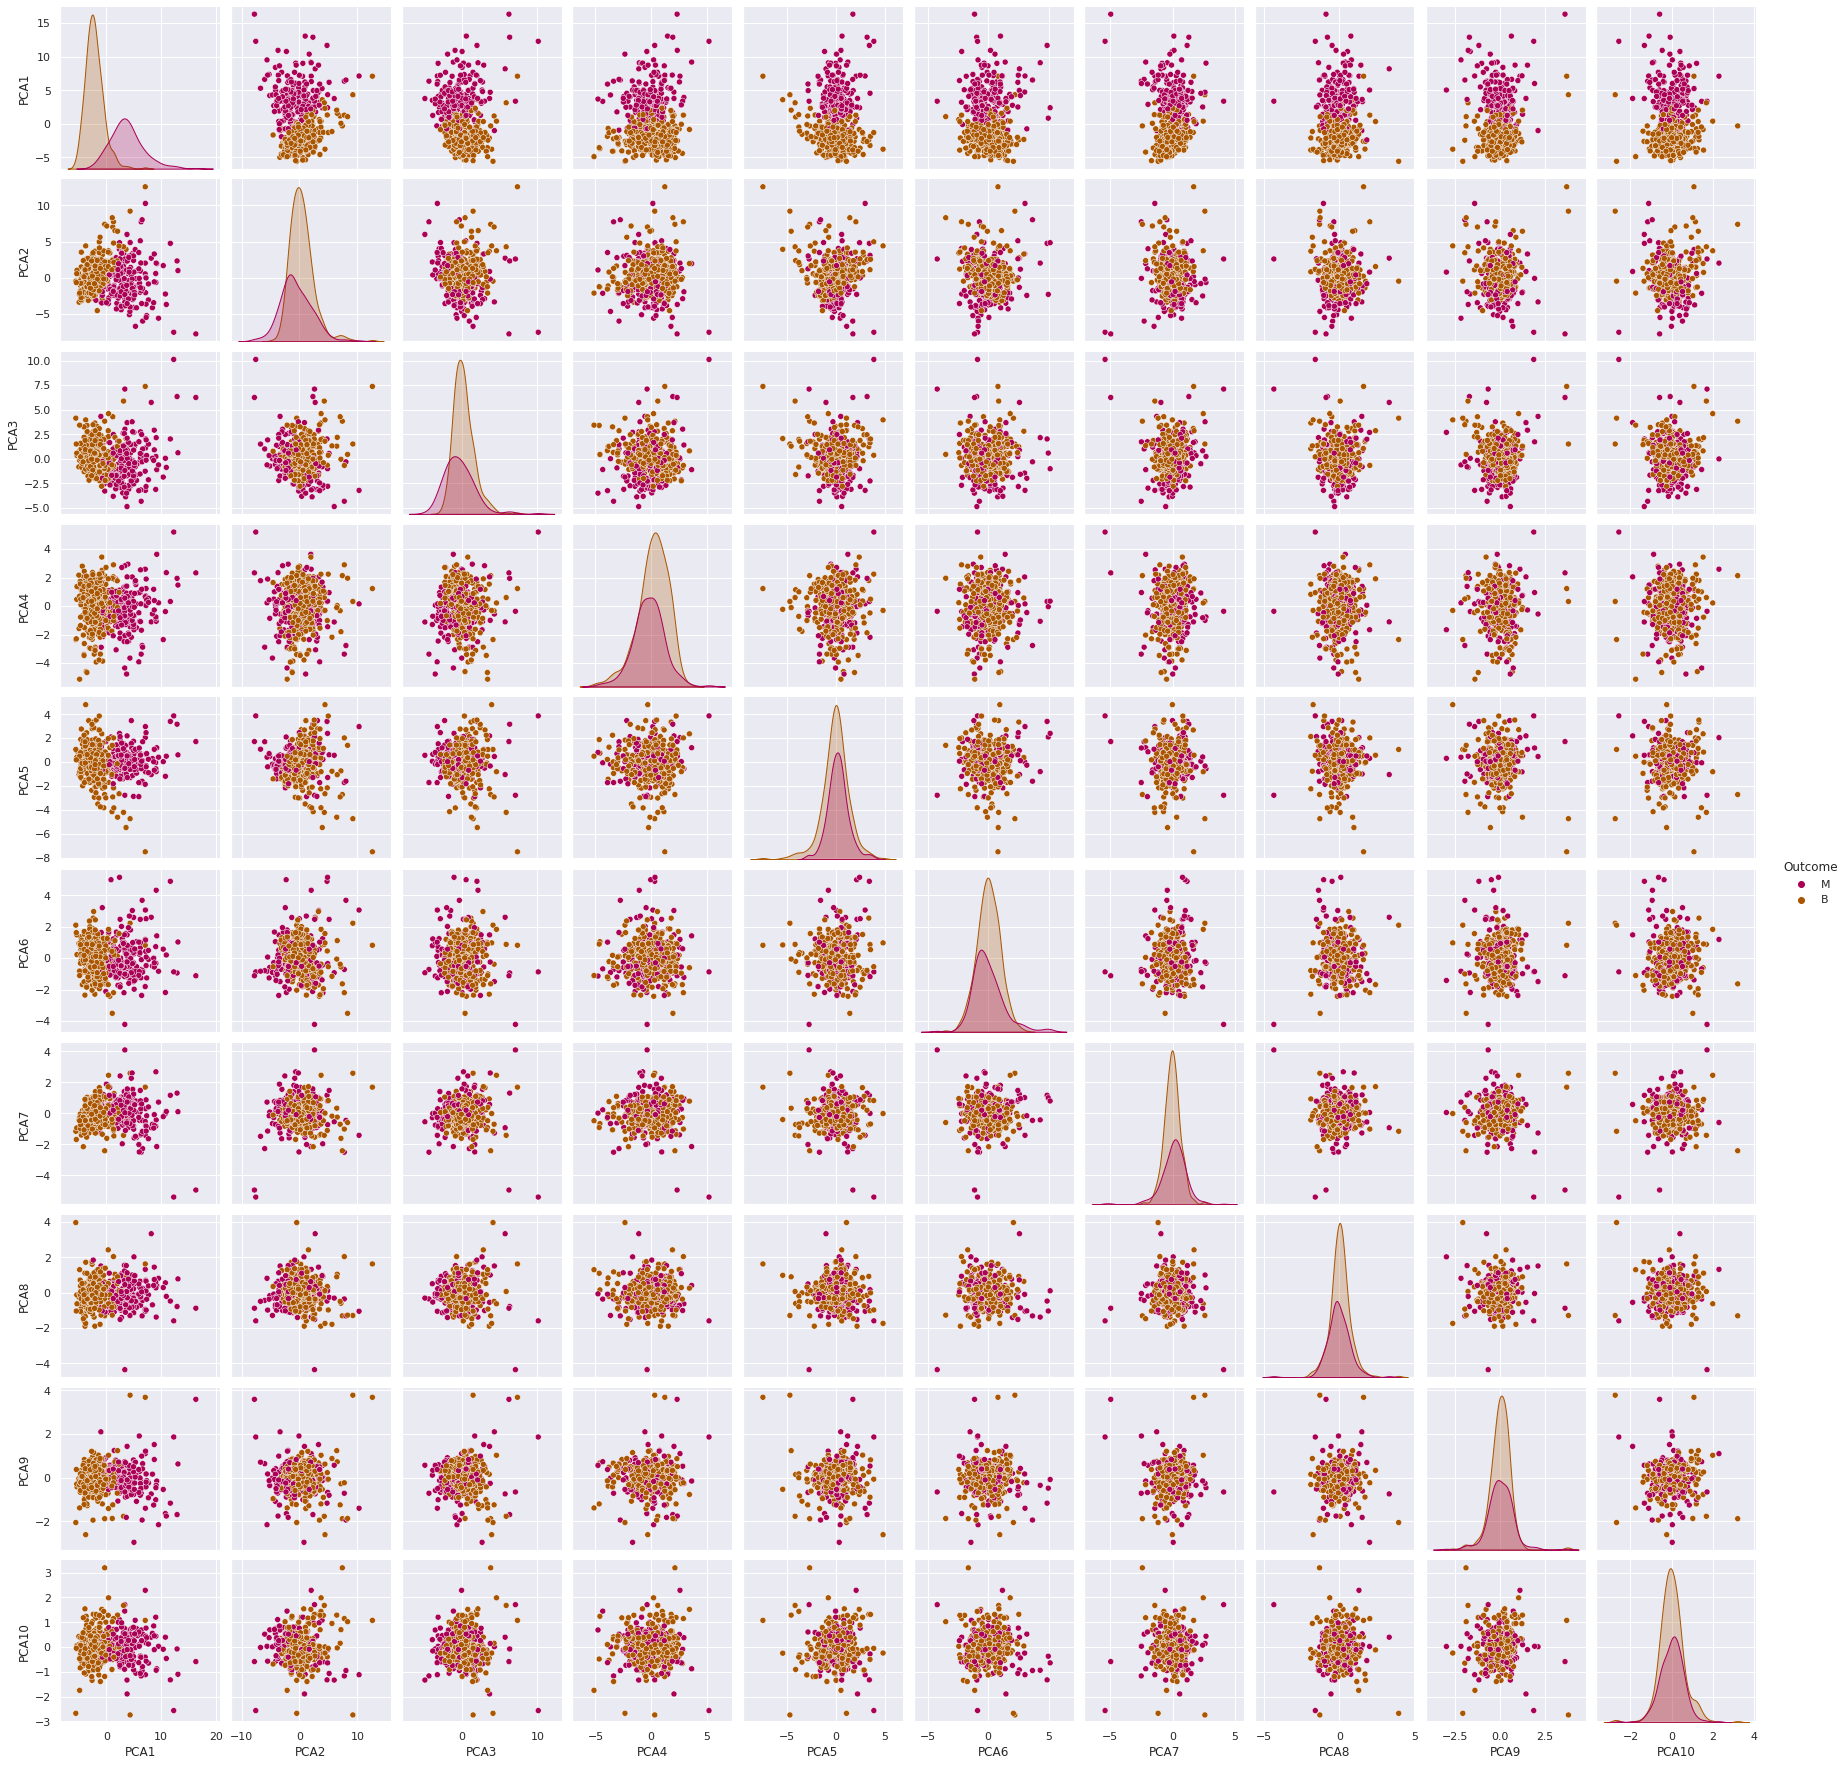

In [72]:
sns.pairplot(data_transformed, hue = "Outcome", palette = "brg")

Percebeu-se então que os dados estão descorrelacionados vistos que já não existem mais comportamentos lineares como mostrados anteriormente. Agora os dados de qualquer um dos parâmetros são muito mais dispersos.